Kelompok 6
1. Alhusna Hanifah (2208107010060)
2. Farhanul Khair (2208107010076)
3. Iffatun Nisa Nasrullah (2208107010009)
4. M. Bintang Indra Hidayat (2208107010023)
5. Qandila Ahmara (2208107010039)

**1. Pemahaman Dataset**

Dataset : Energy Efficiency

Sumber: UCI Machine Learning Repository
https://archive.ics.uci.edu/dataset/242/energy+efficiency

Additional Information:
Analisis energi dilakukan dengan menggunakan 12 bentuk bangunan berbeda yang disimulasikan melalui perangkat lunak Ecotect. Bangunan-bangunan ini memiliki perbedaan dalam luas jendela (glazing area), distribusi luas jendela, serta orientasi bangunan, di samping sejumlah parameter lainnya.

Berbagai konfigurasi disimulasikan berdasarkan karakteristik-karakteristik tersebut, menghasilkan 768 variasi bentuk bangunan. Dataset ini terdiri dari 768 sampel dengan 8 fitur utama, dan bertujuan untuk memprediksi dua nilai keluaran (respon) kontinu, yaitu:

Heating Load (beban pemanasan)

Cooling Load (beban pendinginan)

**Variable Name**	Description
- X1		Relative Compactness
- X2		Surface Area
- X3		Wall Area
- X4		Roof Area
- X5		Overall Height
- X6		Orientation
- X7		Glazing Area
- X8	  Glazing Area Distribution
- Y1		Heating Load
- Y2		Cooling Load


In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_excel("/content/ENB2012_data.xlsx")
data.head(100)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
95,0.62,808.5,367.5,220.50,3.5,5,0.1,1,13.02,14.27
96,0.98,514.5,294.0,110.25,7.0,2,0.1,2,24.29,25.95
97,0.98,514.5,294.0,110.25,7.0,3,0.1,2,24.31,25.63
98,0.98,514.5,294.0,110.25,7.0,4,0.1,2,24.13,26.13


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
# describe data
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


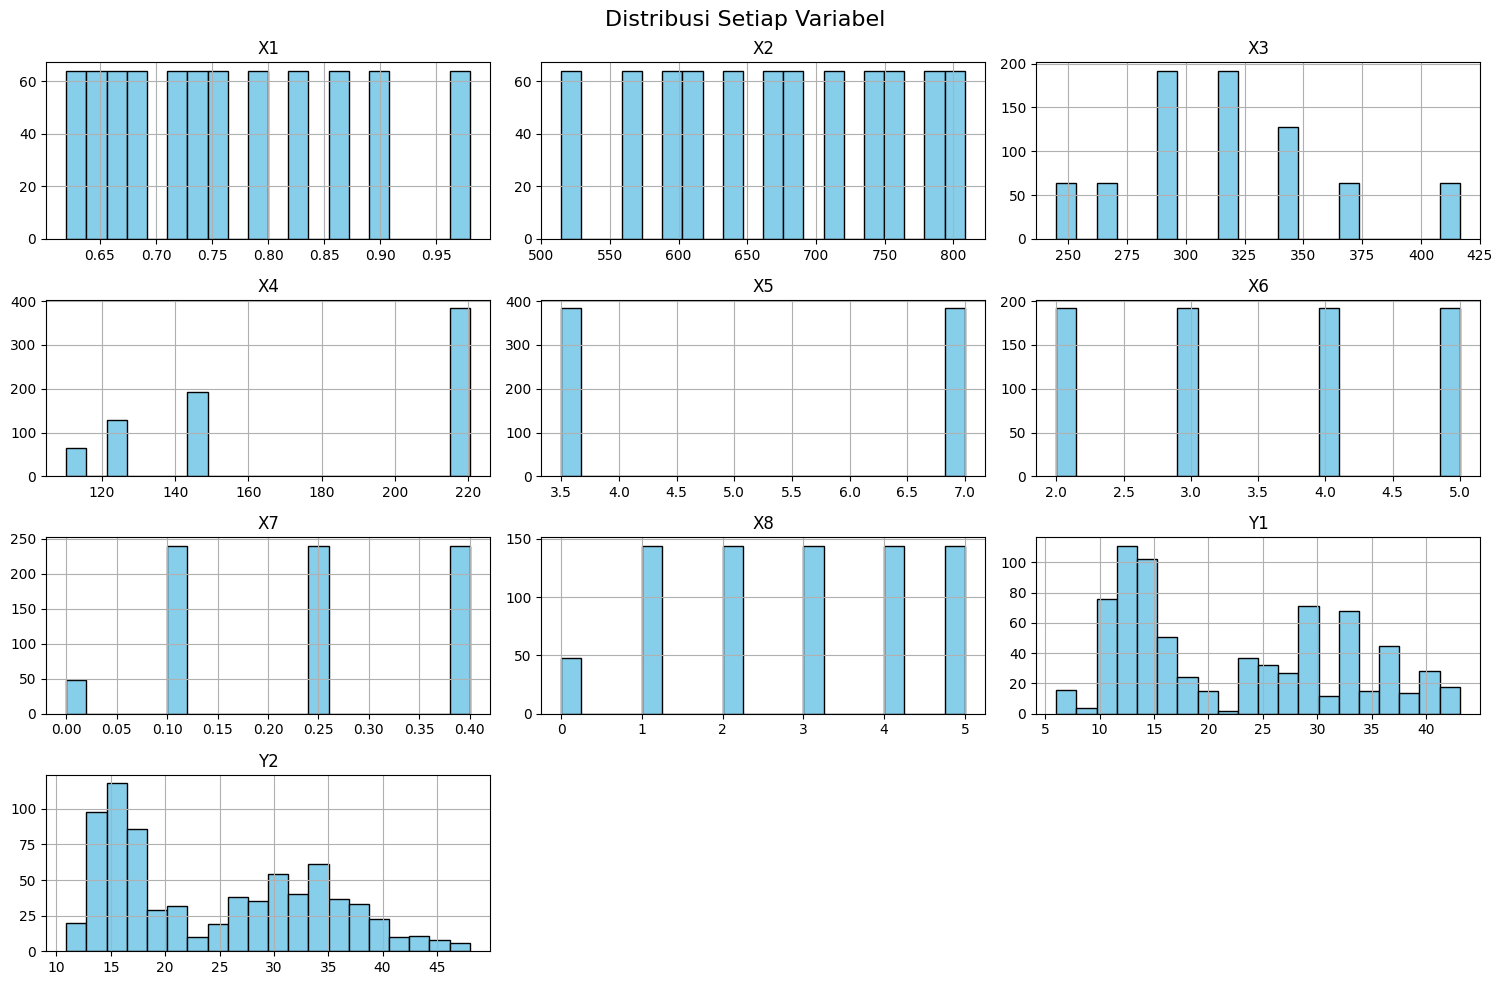

In [5]:
# Visualisasi distribusi tiap fitur numerik
data.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Setiap Variabel", fontsize=16)
plt.tight_layout()
plt.show()

**2. Exploratory Data Analiysis (EDA)/Eksplorasi Data dan Pra-pemrosesan**

In [6]:
# data duplikat
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [7]:
# tampilkan data unik
data.nunique()

,0
X1,12
X2,12
X3,7
X4,4
X5,2
X6,4
X7,4
X8,6
Y1,587
Y2,636


In [8]:
# mengecek missing value
data.isna().sum()

,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
Y1,0
Y2,0


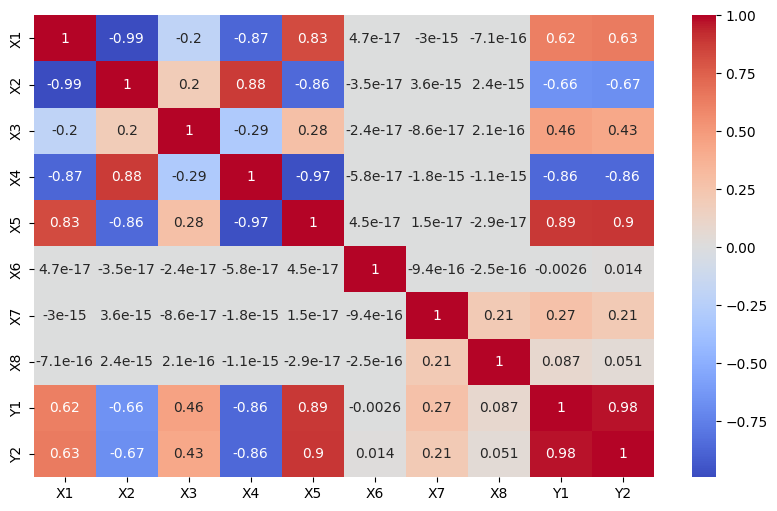

In [9]:
plt.figure(figsize=(10, 6))

# Menghitung korelasi antar variabe
correlation_matrix = data.corr()

# Membuat heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

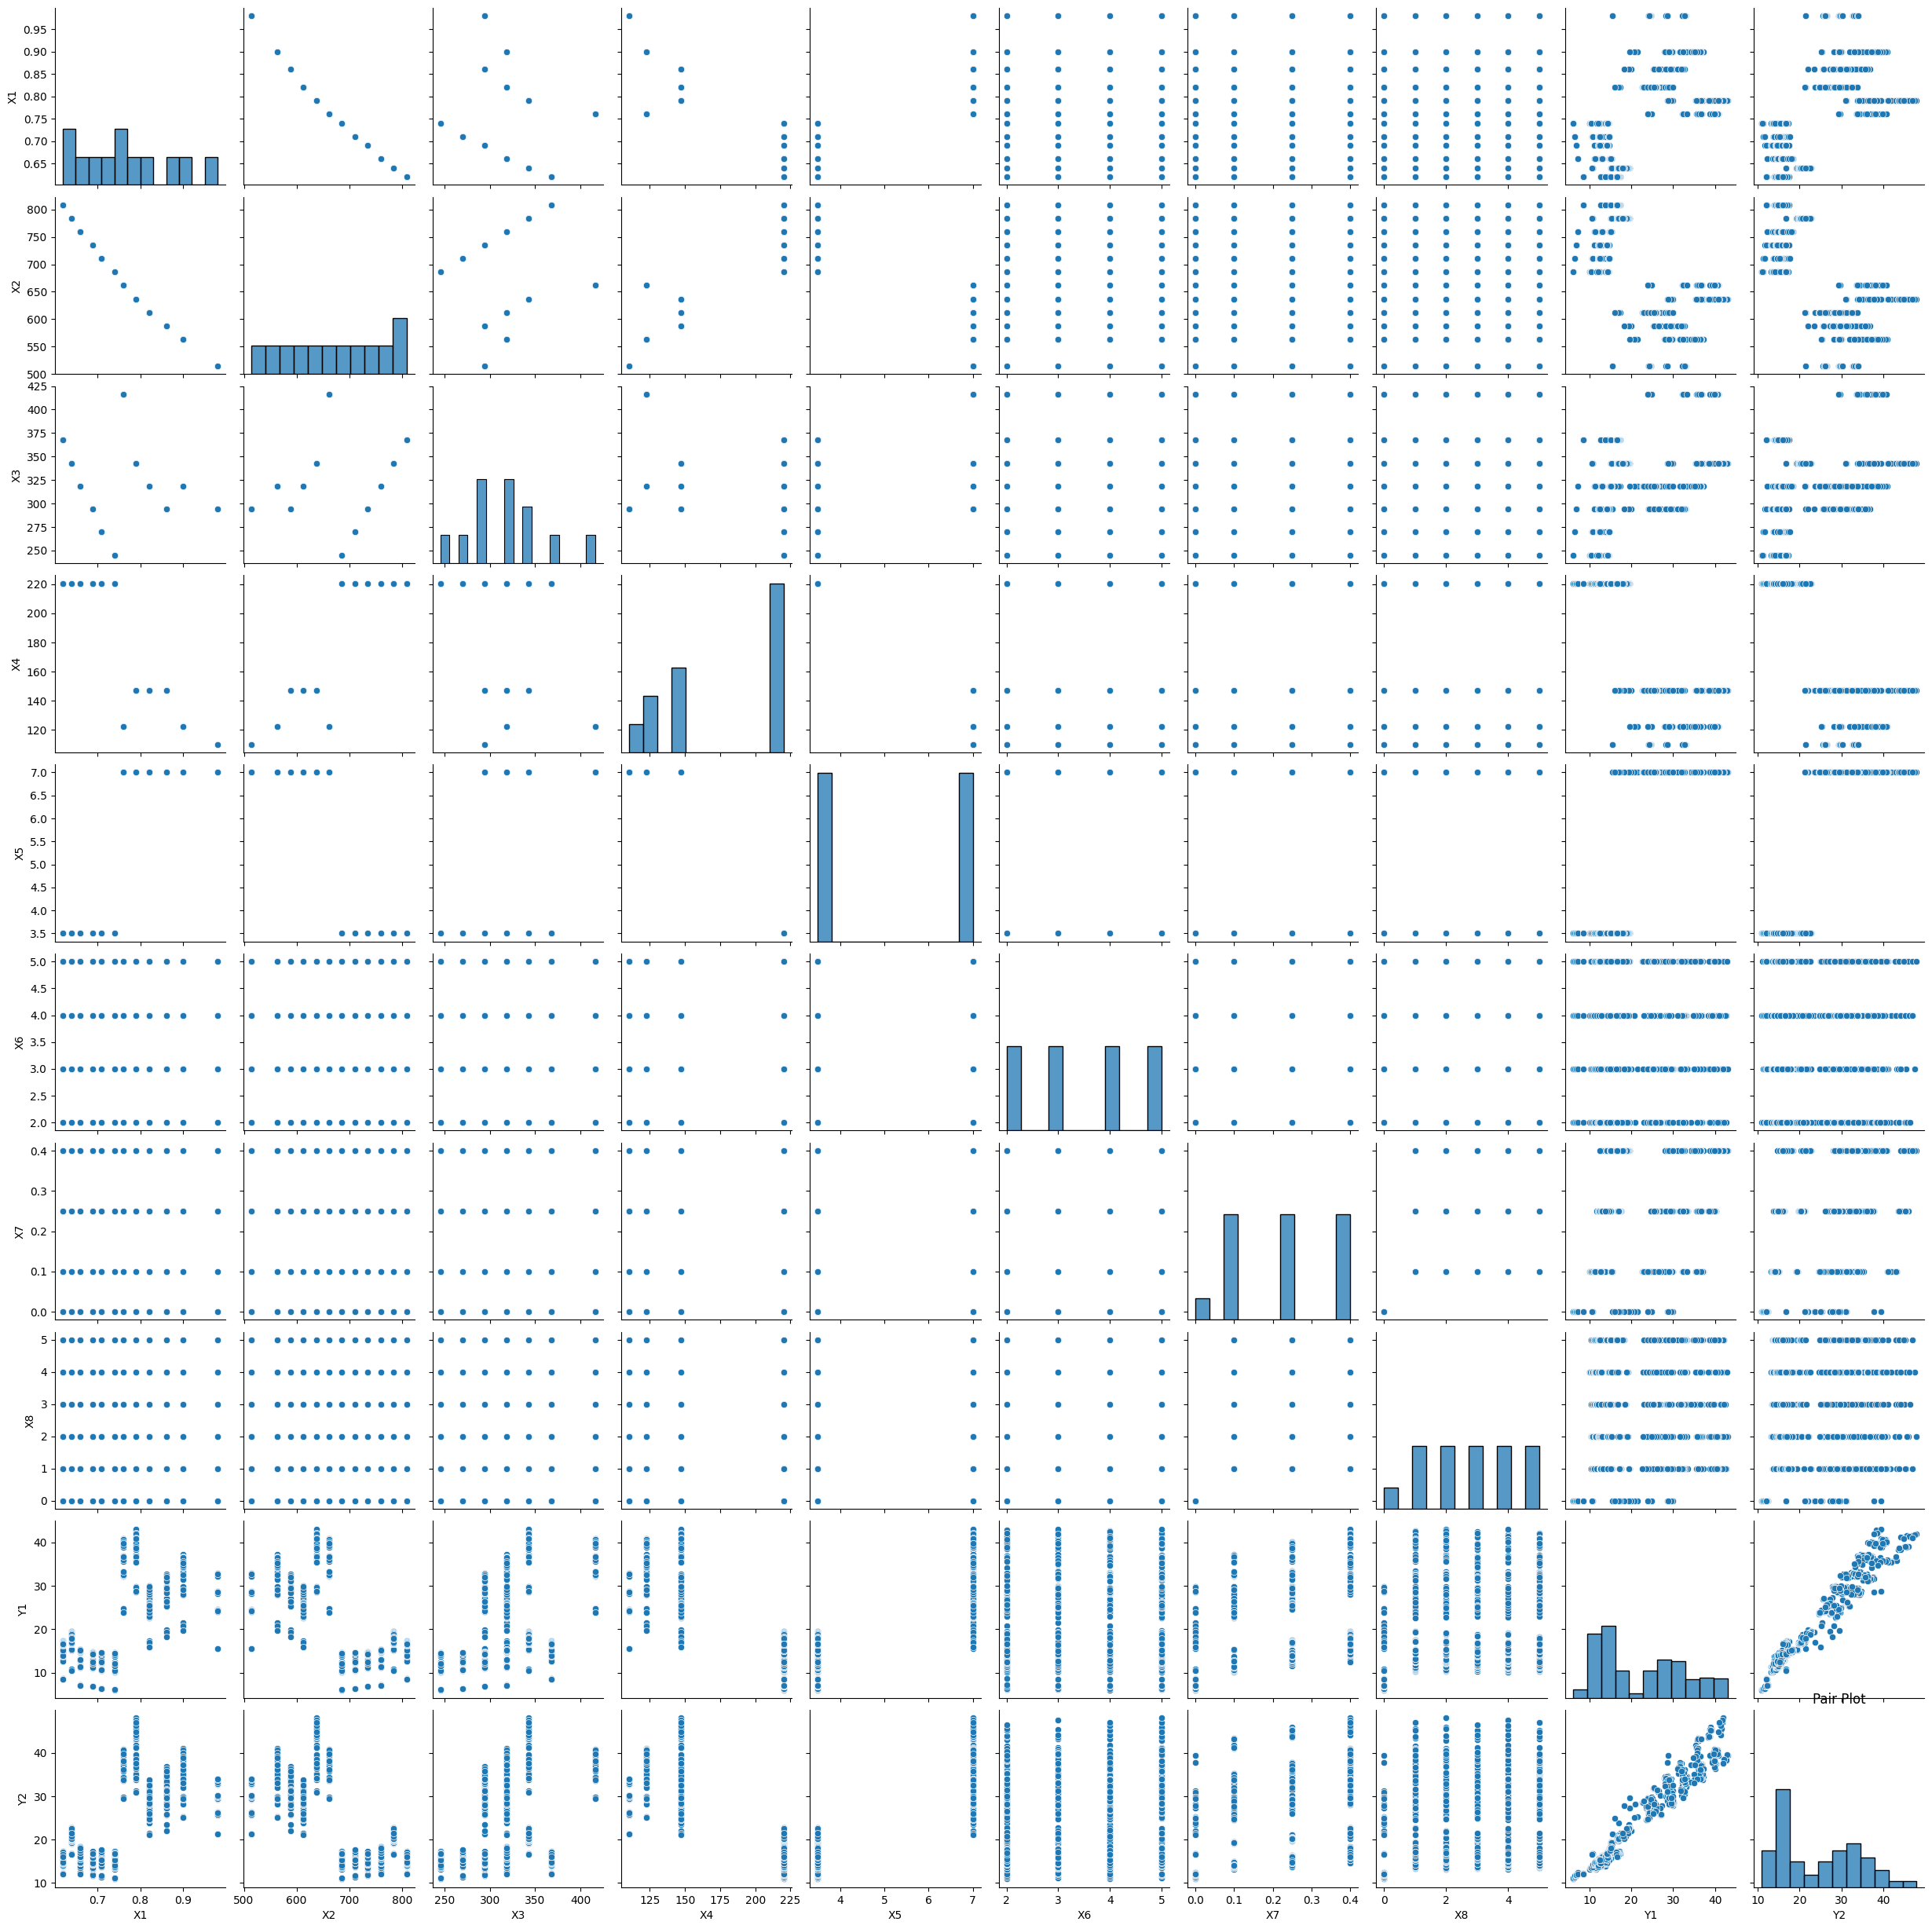

In [10]:
# memeriksa distribusi dan hubungan antar variabel
sns.pairplot(data)
plt.title('Pair Plot')
plt.show()

Variabel relative_compactness dan surface_area memiliki korelasi yang sangat tinggi. Karena surface_area menunjukkan korelasi yang lebih tinggi dengan variabel-variabel lainnya dibandingkan relative_compactness, maka kami memutuskan untuk menghapus surface_area guna menghindari masalah kolinearitas.

Sementara itu, variabel orientation hampir tidak memiliki korelasi dengan heating_load maupun cooling_load. Oleh karena itu, kami mempertimbangkan untuk menghapus orientation guna mengurangi dimensi data (dimensionality reduction).

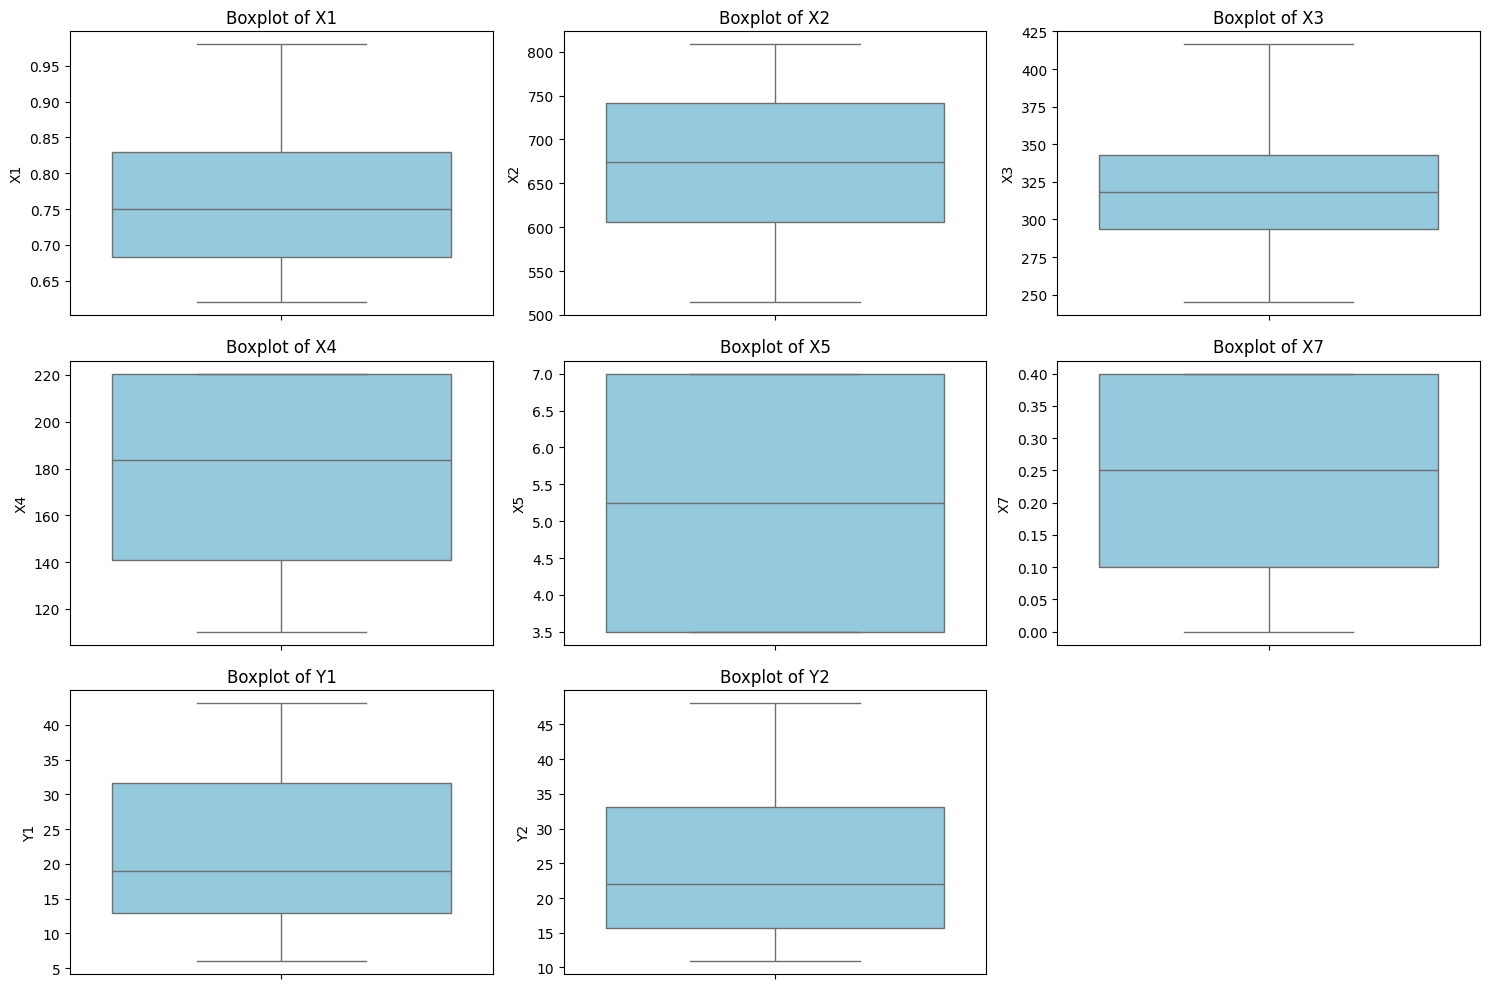

In [11]:
# Daftar kolom numerik untuk dicek
num_cols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'Y1', 'Y2']

# Buat boxplot untuk setiap kolom
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


memeriksa keberadaan outlier pada dataset

In [12]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Cek jumlah outlier per kolom
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"Outlier pada kolom {col}: {len(outliers)} data")

Outlier pada kolom X1: 0 data
Outlier pada kolom X2: 0 data
Outlier pada kolom X3: 0 data
Outlier pada kolom X4: 0 data
Outlier pada kolom X5: 0 data
Outlier pada kolom X7: 0 data
Outlier pada kolom Y1: 0 data
Outlier pada kolom Y2: 0 data


Menghapus kolom surface area karena memiliki korelasi yang sangat tinggi dengan kolom relative_compactness untuk mencegah kolinearitas

In [13]:
# drop surface_area (mencegah kolinearitas)
data.drop(['X2'], axis=1, inplace=True)

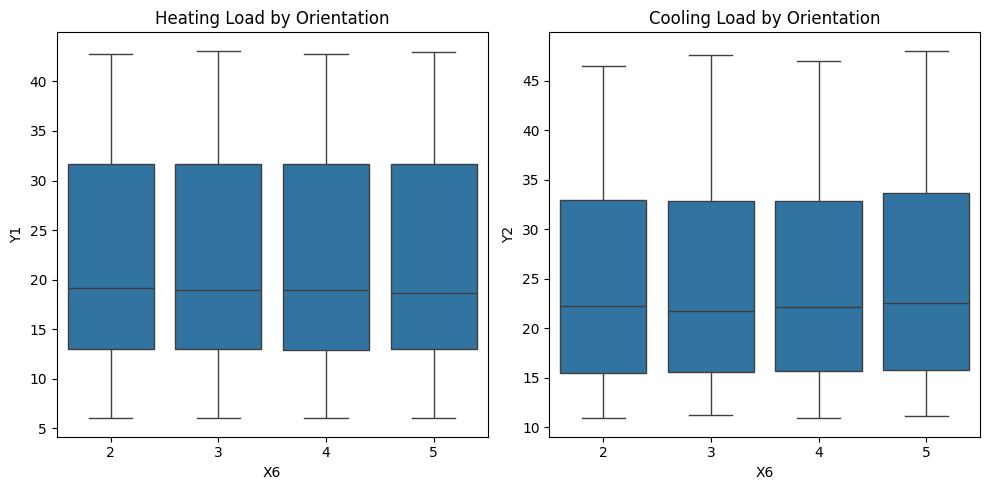

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# melihat apakah orientasi memiliki pengaruh pada target heating load
sns.boxplot(data=data, x='X6', y='Y1', ax=axes[0])
axes[0].set_title('Heating Load by Orientation')

# melihat apakah orientasi memiliki pengaruh pada target cooling load
sns.boxplot(data=data, x='X6', y='Y2', ax=axes[1])
axes[1].set_title('Cooling Load by Orientation')

plt.tight_layout()
plt.show()

Fitur orientasi bangunan (X6) tidak memberikan informasi yang berarti terhadap target Y1 dan Y2.  Secara statistik dan visual, kami mempertimbangkan fitur X6 untuk dihapus (drop) karena tidak relevan atau kurang berkontribusi terhadap prediksi beban energi.

In [15]:
# drop Orientation (mengurangi dimensi)
data.drop(['X6'], axis=1, inplace=True)

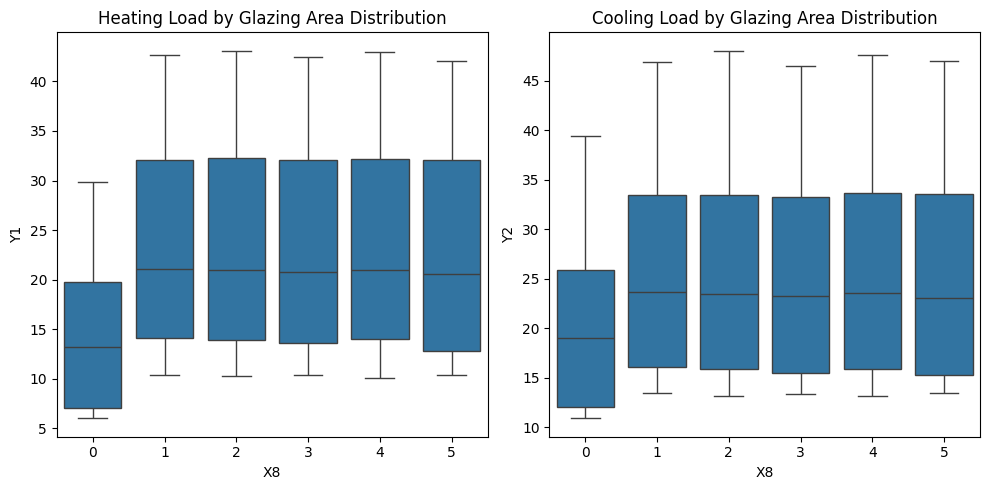

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# melihat apakah Glazing Area Distribution memiliki pengaruh pada target heating load
sns.boxplot(data=data, x='X8', y='Y1', ax=axes[0])
axes[0].set_title('Heating Load by Glazing Area Distribution')

# melihat apakah Glazing Area Distribution memiliki pengaruh pada target cooling load
sns.boxplot(data=data, x='X8', y='Y2', ax=axes[1])
axes[1].set_title('Cooling Load by Glazing Area Distribution')

plt.tight_layout()
plt.show()

 fitur glazing_area_distribution (X8) memiliki nilai: 0, 1, 2, 3, 4, 5
Namun, hanya 0 yang terbukti berpengaruh terhadap target (Y1 dan Y2). Oleh karena itu dilakukan binarisasi

In [17]:
# change glazing_area_distribution to binary variable to reduce dimensionality
data['X8'] = data['X8'].replace({0:0, 1:1, 2:1, 3:1, 4:1, 5:1})
data['X8'] = data['X8'].astype('category')
data['X8'].value_counts()

,count
X8,
1,720
0,48


In [18]:
# splitting the dataset into features and targets
y1 = data['Y1']
y2 = data['Y2']
X = data.drop(['Y1','Y2'], axis = 1)

# check features
features = list(X.columns)
features

['X1', 'X3', 'X4', 'X5', 'X7', 'X8']

**3. Implementasi Model**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
seed = 1

Split Data

In [20]:
# split the dataset into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.30, random_state=seed)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.30, random_state=seed)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
print("X_train shape: {}".format(X_train.shape))
print("y1_train shape: {}".format(y1_train.shape))
print("y2_train shape: {}".format(y2_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y1_test shape: {}".format(y1_test.shape))
print("y2_test shape: {}".format(y2_test.shape))

X_train shape: (537, 6)
y1_train shape: (537,)
y2_train shape: (537,)
X_test shape: (231, 6)
y1_test shape: (231,)
y2_test shape: (231,)


Membangun Model Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression

Linear = LinearRegression()

Linear_heating = Linear.fit(X_train, y1_train)
Linear_cooling = Linear.fit(X_train, y2_train)

In [23]:
# making predictions on the testing set
y1_pred = Linear_heating.predict(X_test)
y2_pred = Linear_cooling.predict(X_test)

Membangun Model Polynomial Regression

In [24]:
degree = 2
poly = PolynomialFeatures(degree=degree)

X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Training model polynomial
poly_model_y1 = LinearRegression().fit(X_poly_train, y1_train)
poly_model_y2 = LinearRegression().fit(X_poly_train, y2_train)

# Prediksi
y1_poly_pred = poly_model_y1.predict(X_poly_test)
y2_poly_pred = poly_model_y2.predict(X_poly_test)

**4. Evaluasi Model**

Evaluasi Model Linear Regression

In [25]:
# Evaluasi model untuk Target Y1 (Heating Load)
mse = mean_squared_error(y1_test, y1_pred)
mae = mean_absolute_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

print("Target Y1 : Heating Load Model Linear")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

# Evaluasi model untuk Target Y2 (Cooling Load)
mse = mean_squared_error(y2_test, y2_pred)
mae = mean_absolute_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

print("\nTarget Y2 : Cooling Load Model Linear")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

Target Y1 : Heating Load Model Linear
Mean Squared Error (MSE): 16.61168185621388
Mean Absolute Error (MAE): 3.391513852970394
R-squared (R2) Score: 0.8370216649634756

Target Y2 : Cooling Load Model Linear
Mean Squared Error (MSE): 12.235338342910904
Mean Absolute Error (MAE): 2.49775285370513
R-squared (R2) Score: 0.8658554982184952


Model regresi linear menunjukkan performa yang baik dalam memprediksi Heating Load (Y1) dan Cooling Load (Y2). Untuk Y1, model mampu menjelaskan sekitar 83.7% variasi data (R² = 0.837) dengan kesalahan rata-rata sekitar 3.39. Sementara itu, untuk Y2, model menjelaskan sekitar 86.6% variasi data (R² = 0.866) dengan kesalahan rata-rata 2.50. Hal ini menunjukkan bahwa regresi linear cukup efektif digunakan untuk prediksi efisiensi energi pada bangunan dalam studi ini.

Evaluasi Model Polynomial Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# Fungsi untuk evaluasi model
def evaluate_model(y_test, y_pred, target_name=""):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nEvaluasi Model untuk {target_name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R²) Score: {r2:.4f}")

# Evaluasi Polynomial Regression
evaluate_model(y1_test, y1_poly_pred, "Y1 - Heating Load (Polynomial)")
evaluate_model(y2_test, y2_poly_pred, "Y2 - Cooling Load (Polynomial)")



Evaluasi Model untuk Y1 - Heating Load (Polynomial)
Mean Squared Error (MSE): 0.2940
Mean Absolute Error (MAE): 0.4039
R-squared (R²) Score: 0.9971

Evaluasi Model untuk Y2 - Cooling Load (Polynomial)
Mean Squared Error (MSE): 3.3726
Mean Absolute Error (MAE): 1.2419
R-squared (R²) Score: 0.9630


Hasil evaluasi Polynomial Regression menunjukkan performa yang sangat baik, terutama pada target Y1 (Heating Load) dengan nilai R² sebesar 0.9971 yang berarti model mampu menjelaskan 99.71% variasi pada data, serta nilai MSE dan MAE yang sangat rendah yaitu 0.2940 dan 0.4039, menandakan bahwa selisih antara prediksi dan data aktual sangat kecil. Untuk target Y2 (Cooling Load), performa model juga masih sangat baik dengan R² sebesar 0.9630, MSE sebesar 3.3726, dan MAE sebesar 1.2419, menunjukkan bahwa meskipun tidak seakurat model pada Y1, model polynomial tetap berhasil menangkap pola data dengan baik dan memiliki akurasi yang tinggi.

Visualisasi Perbandingan Kinerja Model Linear Regression dan Polynomial Regression

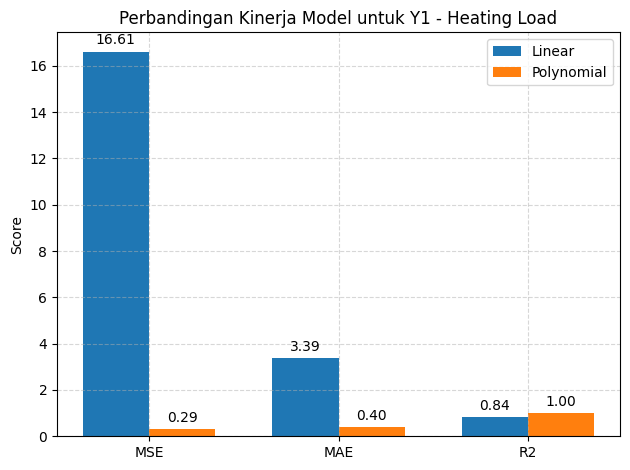

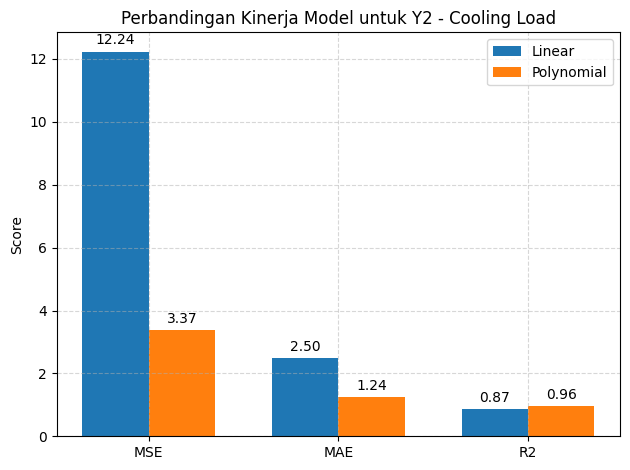

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Nilai evaluasi model (isi sesuai hasil kamu)
linear_metrics_y1 = {
    'MSE': mean_squared_error(y1_test, y1_pred),
    'MAE': mean_absolute_error(y1_test, y1_pred),
    'R2': r2_score(y1_test, y1_pred)
}

poly_metrics_y1 = {
    'MSE': mean_squared_error(y1_test, y1_poly_pred),
    'MAE': mean_absolute_error(y1_test, y1_poly_pred),
    'R2': r2_score(y1_test, y1_poly_pred)
}

linear_metrics_y2 = {
    'MSE': mean_squared_error(y2_test, y2_pred),
    'MAE': mean_absolute_error(y2_test, y2_pred),
    'R2': r2_score(y2_test, y2_pred)
}

poly_metrics_y2 = {
    'MSE': mean_squared_error(y2_test, y2_poly_pred),
    'MAE': mean_absolute_error(y2_test, y2_poly_pred),
    'R2': r2_score(y2_test, y2_poly_pred)
}

# Plotting function
def plot_comparison(metrics_linear, metrics_poly, target_name):
    labels = list(metrics_linear.keys())
    linear_values = list(metrics_linear.values())
    poly_values = list(metrics_poly.values())

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    bars1 = ax.bar(x - width/2, linear_values, width, label='Linear')
    bars2 = ax.bar(x + width/2, poly_values, width, label='Polynomial')

    ax.set_ylabel('Score')
    ax.set_title(f'Perbandingan Kinerja Model untuk {target_name}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    # Add value labels
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Visualisasi untuk Y1 dan Y2
plot_comparison(linear_metrics_y1, poly_metrics_y1, "Y1 - Heating Load")
plot_comparison(linear_metrics_y2, poly_metrics_y2, "Y2 - Cooling Load")


Berdasarkan hasil visualisasi perbandingan kinerja model regresi linear dan polinomial, terlihat bahwa model regresi polinomial menunjukkan performa yang jauh lebih baik dibandingkan regresi linear. Hasil ini menunjukkan bahwa hubungan antara variabel input dan output dalam dataset ini bersifat non-linear, sehingga pendekatan regresi polinomial lebih mampu menangkap pola hubungan tersebut dibandingkan model linear. Dengan kata lain, model regresi polinomial lebih sesuai digunakan untuk memprediksi Heating Load dan Cooling Load pada data ini.

**5. Analisis Hasil**

Melihat dan memahami koefisien Regresi

In [29]:
print("Koefisien Linear Regression")
print("Intercept Model Heating Load", Linear_heating.intercept_)
print("Koefisien Model Heating Load", Linear_heating.coef_)
print("Intercept Model Cooling Load", Linear_cooling.intercept_)
print("Koefisien Model Cooling Load", Linear_cooling.coef_)

Koefisien Linear Regression
Intercept Model Heating Load 24.170484171322162
Koefisien Model Heating Load [-8.15611491 -2.22751434 -8.97042537  7.13172224  1.75407123  0.5130585 ]
Intercept Model Cooling Load 24.170484171322162
Koefisien Model Cooling Load [-8.15611491 -2.22751434 -8.97042537  7.13172224  1.75407123  0.5130585 ]


In [30]:
print("Koefisien Polynomial Regression")
print("Intercept Model Heating Load", poly_model_y1.intercept_)
print("Koefisien Model Heating Load", poly_model_y1.coef_)
print("Intercept Model Cooling Load", poly_model_y2.intercept_)
print("Koefisien Model Cooling Load", poly_model_y2.coef_)

Koefisien Polynomial Regression
Intercept Model Heating Load 98.25015058779054
Koefisien Model Heating Load [ 1.47870197e-09 -9.92811641e+00  2.88136458e+01  1.09435590e+03
  1.06022377e+03  2.10608197e+00  1.13091443e-01 -2.00477840e+03
 -1.64918532e+03 -3.41968666e+03  5.02328450e+02  3.23328620e-01
 -1.71163971e-01 -3.37522692e+02 -1.32697809e+03  3.15107958e+02
  1.86280692e-01 -8.77695988e-02  4.86051421e+01  2.13164778e+03
 -9.08881193e-01 -6.00863786e-01  9.09033302e+01 -5.36138402e-01
 -1.42045293e-01  1.30190411e-01  3.29909704e-01 -4.20794649e-01]
Intercept Model Cooling Load 108.87353946336023
Koefisien Model Cooling Load [ 2.10533179e-09 -6.84503060e+01  8.06081659e+00  1.52533096e+03
  1.52374522e+03  1.67560568e+00  6.88205368e-02 -2.86369542e+03
 -2.36411185e+03 -4.87198248e+03  6.83957102e+02  6.07465282e-01
  2.06440269e-02 -4.85921184e+02 -1.89888774e+03  4.25504416e+02
  1.92752387e-01  2.09356308e-02  1.09969812e+02  3.01404007e+03
 -6.97655483e-01  3.96070570e-01  

Pada model regresi linear, nilai intercept untuk Heating Load dan Cooling Load adalah sebesar 24.17, yang berarti ketika seluruh fitur input bernilai nol, nilai dasar beban pemanasan dan pendinginan diperkirakan sebesar 24.17. Koefisien pada model ini menunjukkan bahwa fitur Relative Compactness memiliki pengaruh negatif paling besar terhadap beban energi, yaitu -8.156, menandakan bahwa semakin kompak bentuk bangunan, maka beban pemanasan dan pendinginan cenderung berkurang. Sementara itu, Roof Area memiliki pengaruh positif yang cukup besar (7.132), menunjukkan bahwa semakin besar luas atap, semakin tinggi beban energinya. Fitur lainnya seperti Wall Area, Overall Height, dan Orientation memiliki pengaruh yang lebih kecil.

Sementara itu, pada model regresi polinomial, nilai intercept untuk Heating Load sebesar 98.25 dan untuk Cooling Load sebesar 108.87. Koefisien dalam model ini jauh lebih kompleks karena melibatkan interaksi antar fitur dan pangkat dari fitur-fitur tersebut. Nilai koefisien yang besar, baik positif maupun negatif, mengindikasikan adanya hubungan non-linear yang signifikan antara fitur-fitur gabungan terhadap beban energi. Namun, karena kompleksitas hubungan tersebut, interpretasi satu per satu terhadap koefisien menjadi tidak intuitif. Model polinomial lebih mampu menangkap pola yang tidak linear dalam data, tetapi kurang transparan dibanding model linear. Oleh karena itu, model linear cocok digunakan untuk interpretasi dan pemahaman awal, sementara model polinomial lebih efektif dalam hal akurasi prediksi ketika hubungan antar fitur bersifat kompleks.

Menyajikan grafik regression line dan polynomial fit.

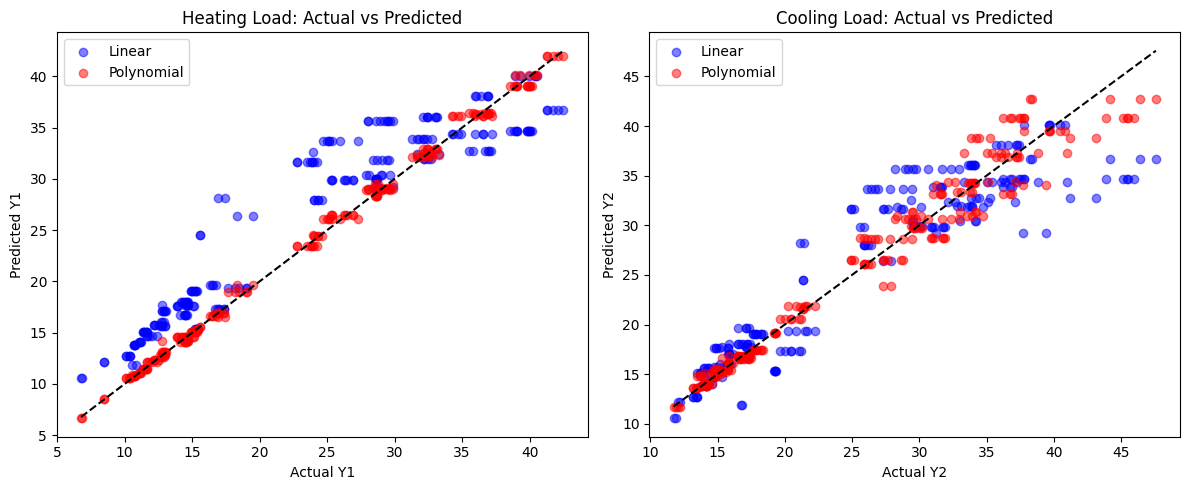

In [28]:
# Perbandingan prediksi linear dan polynomial untuk Y1
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y1_test, y1_pred, color='blue', alpha=0.5, label="Linear")
plt.scatter(y1_test, y1_poly_pred, color='red', alpha=0.5, label="Polynomial")
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--')
plt.xlabel("Actual Y1")
plt.ylabel("Predicted Y1")
plt.title("Heating Load: Actual vs Predicted")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y2_test, y2_pred, color='blue', alpha=0.5, label="Linear")
plt.scatter(y2_test, y2_poly_pred, color='red', alpha=0.5, label="Polynomial")
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'k--')
plt.xlabel("Actual Y2")
plt.ylabel("Predicted Y2")
plt.title("Cooling Load: Actual vs Predicted")
plt.legend()

plt.tight_layout()
plt.show()


Berdasarkan visualisasi scatter plot perbandingan antara nilai aktual dan nilai prediksi untuk *Heating Load* (Y1) dan *Cooling Load* (Y2), terlihat bahwa model Polynomial Regression (ditunjukkan dengan titik merah) memiliki sebaran yang lebih dekat ke garis diagonal (garis prediksi sempurna) dibandingkan dengan Linear Regression (titik biru), yang berarti prediksi Polynomial lebih akurat dan konsisten dalam mengikuti nilai aktual. Hal ini terutama sangat jelas pada grafik Heating Load di mana titik-titik merah hampir menempel pada garis, sementara titik-titik biru dari Linear Regression tampak lebih menyebar. Untuk Cooling Load, meskipun Polynomial juga menunjukkan perbaikan dibandingkan Linear, sebarannya sedikit lebih lebar dibandingkan Heating Load, namun tetap menunjukkan performa yang lebih baik secara visual.

**Kesimpulan:**

Model yang dibuat, terutama regresi polinomial, menunjukkan performa yang sangat baik dalam memprediksi kedua target, yaitu Heating Load (Y1) dan Cooling Load (Y2). Hal ini terlihat dari nilai error yang sangat rendah dan nilai R² yang mendekati 1, yang menandakan bahwa model mampu menjelaskan hampir seluruh variasi data dengan sangat akurat. Sementara itu, model regresi linear memberikan hasil yang cukup baik, namun tidak seakurat model polinomial. Nilai error pada regresi linear masih tergolong tinggi, dan nilai R² yang lebih rendah menunjukkan bahwa model ini kurang mampu menangkap hubungan non-linear dalam data. Oleh karena itu, dapat disimpulkan bahwa meskipun model linear memberikan gambaran awal yang cukup, model polinomial jauh lebih cocok dan andal untuk prediksi pada dataset ini.